In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt



In [0]:
np.random.seed(0)

X, y = datasets.make_circles(n_samples=1000, factor=.3, noise=0.15)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.30, random_state=42)

Text(0, 0.5, '$x_2$')

<Figure size 432x288 with 0 Axes>

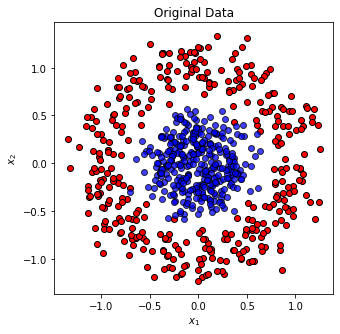

In [10]:
plt.figure()
plt.subplots(1,1,figsize=(5,5))
# plt.subplot(1,2,3, projection='polar')
plt.title("Original Data")
reds = y_train == 0
blues = y_train == 1

plt.scatter(X_train[reds, 0], X_train[reds, 1] ,c="red",alpha=1 ,
             edgecolor='k')
plt.scatter(X_train[blues, 0], X_train[blues, 1], c="blue",alpha=0.75 ,
            edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [11]:
tf.random.set_seed(1)

## input layer:
inputs = tf.keras.Input(shape=(2,))

## hidden layers
h1 = tf.keras.layers.Dense(units=4, activation='relu')(inputs)
h2 = tf.keras.layers.Dense(units=4, activation='relu')(h1)
h3 = tf.keras.layers.Dense(units=4, activation='relu')(h2)

## output:
outputs = tf.keras.layers.Dense(units=1, activation='sigmoid')(h3)

## construct a model:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [0]:

## compile:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])


In [0]:
%%time
## train:
hist = model.fit(X_train, y_train, 
                 validation_data=(X_valid, y_valid), 
                 epochs=100, batch_size=2, verbose=0)

history = hist.history

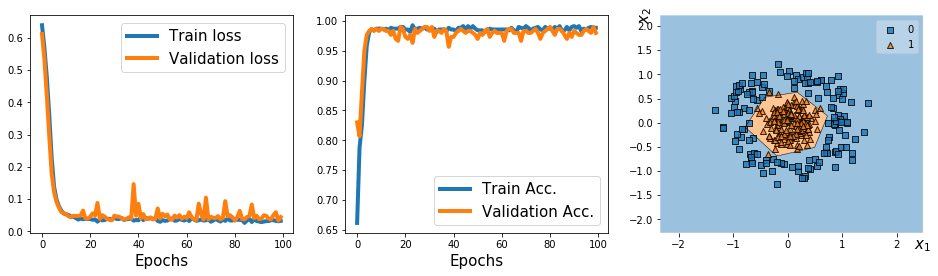

In [15]:
from mlxtend.plotting import plot_decision_regions

history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=X_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [16]:
model.evaluate(X_valid,y_valid,verbose=2)

300/300 - 0s - loss: 0.0444 - binary_accuracy: 0.9800


[0.044434952347849804, 0.98]

Model class